# ___Definición del Proyecto___

* __Motivación:__

* _Analizar el rendimiento de jugadores de fútbol en las temporadas 2020/21 y 2021/22 para identificar patrones y tendencias._

* __Audiencia:__

* _Analistas Deportivos._
* _Aficionados al deporte._
* _Directivos de clubes._

* __Preguntas/Hipótesis:__

* _¿La edad influye significativamente en el rendimiento de un jugador de fútbol?_
* _¿Cómo se relacionan la edad, el valor actual y el valor máximo de un jugador en el mercado?_
* _¿Cuál es la contribución relativa de asistencias y goles en la efectividad global de un jugador en su posición, y edad?_

# ___Recolección de Datos___

* __Obtención de datos:__

* __Dataset: Información de jugadores de fútbol (2020/21 y 2021/22).__
-  ____https://www.kaggle.com/datasets/khanghunhnguyntrng/football-players-transfer-fee-prediction-dataset____

*   __Variables (Relevantes)__

* __Nombre__: _Nombre del jugador._
* __Equipo__: _Equipo al que pertenece el jugador._
* __Edad__: _Edad del jugador._
* __Posicion__: _Posición en la que juega el jugador._
* __Goles__: _Cantidad de goles anotados por el jugador (promedio por partido)._
* __Apariciones__: _Cantidad de partidos disputados por el jugador._
* __Asistencias__: _Cantidad de asistencias realizadas por el jugador (promedio por partido)._
* __Valor Actual__: _Valor de mercado actual del jugador._
* __Valor Maximo__: _Valor de mercado maximo del jugador._

In [23]:
# librerias a usar
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib as mlp 
import matplotlib.pyplot as plt 

* __Resumen de metadata:__

* _Numero de registros:_

In [24]:
# lectura 
df=pd.read_csv("./data.csv")
numero_de_registros=len(df)
print(f"El dataset cuenta con un numero total de: '{numero_de_registros}' registros.")

El dataset cuenta con un numero total de: '10754' registros.


* _Variables:_

In [25]:
# explicacion de variables
metadata = {
    'Equipo': 'El equipo al que pertenece el jugador',
    'Nombre': 'El nombre del jugador de fútbol',
    'Posicion': 'La posición en la que juega el jugador en el campo',
    'Altura': 'La altura del jugador en centímetros',
    'Edad': 'La edad del jugador',
    'Apariciones': 'El número de veces que el jugador ha disputado',
    'Goles': 'La cantidad de goles que el jugador ha marcado',
    'Asistencias': 'El número de asistencias que el jugador ha realizado',
    'Tarjetas Amarillas': 'La cantidad de tarjetas amarillas recibidas por el jugador',
    '2da Tarjeta Amarillas': 'La cantidad de segundas tarjetas amarillas recibidas por el jugador',
    'Tarjetas Rojas': 'La cantidad de tarjetas rojas recibidas por el jugador',
    'Goles Concedidos': 'La cantidad de goles que el equipo del jugador ha concedido',
    'Valla Invicta': 'El número de partidos en los que el equipo del jugador mantuvo su arco sin recibir goles',
    'Minutos Jugados': 'El total de minutos que el jugador ha jugado en partidos',
    'Dias De baja por Lesion': 'El número de días que el jugador estuvo de baja debido a lesiones',
    'Partidos Perdidos por Lesion': 'El número de partidos que el jugador se perdió debido a lesiones',
    'Premios': 'Los premios recibidos por el jugador',
    'Valor Actual': 'El valor de mercado actual del jugador',
    'Valor Maximo': 'El valor de mercado máximo alcanzado por el jugador',
    'Posicion Numero': 'La posición específica del jugador en el equipo',
    'Extremo': 'Una indicación de si el jugador juega en una posición de extremo en el campo'
}


# Imprimir el diccionario de descripciones de variables
for variable, descripcion in metadata.items():
    print(f"{variable}: {descripcion}.")

Equipo: El equipo al que pertenece el jugador.
Nombre: El nombre del jugador de fútbol.
Posicion: La posición en la que juega el jugador en el campo.
Altura: La altura del jugador en centímetros.
Edad: La edad del jugador.
Apariciones: El número de veces que el jugador ha disputado.
Goles: La cantidad de goles que el jugador ha marcado.
Asistencias: El número de asistencias que el jugador ha realizado.
Tarjetas Amarillas: La cantidad de tarjetas amarillas recibidas por el jugador.
2da Tarjeta Amarillas: La cantidad de segundas tarjetas amarillas recibidas por el jugador.
Tarjetas Rojas: La cantidad de tarjetas rojas recibidas por el jugador.
Goles Concedidos: La cantidad de goles que el equipo del jugador ha concedido.
Valla Invicta: El número de partidos en los que el equipo del jugador mantuvo su arco sin recibir goles.
Minutos Jugados: El total de minutos que el jugador ha jugado en partidos.
Dias De baja por Lesion: El número de días que el jugador estuvo de baja debido a lesiones.

# _Análisis Exploratorio de Datos (EDA)_

In [4]:
# columnas/variables
df.columns

Index(['Equipo', 'Nombre', 'Posicion', 'Altura', 'Edad', 'Apariciones',
       'Goles', 'Asistencias', 'Tarjetas Amarillas', '2da Tarjeta Amarillas',
       'Tarjetas Rojas', 'Goles Concedidos', 'Valla Invicta',
       'Minutos Jugados', 'Dias De baja por Lesion',
       'Partidos Perdidos por Lesion', 'Premios', 'Valor Actual',
       'Valor Maximo', 'Posicion Numero', 'Extremo'],
      dtype='object')

In [26]:
# tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Equipo                        10754 non-null  object 
 1   Nombre                        10754 non-null  object 
 2   Posicion                      10754 non-null  object 
 3   Altura                        10754 non-null  float64
 4   Edad                          10754 non-null  float64
 5   Apariciones                   10754 non-null  int64  
 6   Goles                         10754 non-null  float64
 7   Asistencias                   10754 non-null  float64
 8   Tarjetas Amarillas            10754 non-null  float64
 9   2da Tarjeta Amarillas         10754 non-null  float64
 10  Tarjetas Rojas                10754 non-null  float64
 11  Goles Concedidos              10754 non-null  float64
 12  Valla Invicta                 10754 non-null  float64
 13  M

In [27]:
# resumen estadistico
df.describe().round(3)

,Altura,Edad,Apariciones,Goles,Asistencias,Tarjetas Amarillas,2da Tarjeta Amarillas,Tarjetas Rojas,Goles Concedidos,Valla Invicta,Minutos Jugados,Dias De baja por Lesion,Partidos Perdidos por Lesion,Premios,Valor Actual,Valor Maximo,Posicion Numero,Extremo
count,10754.00,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,1.075400e+04,1.075400e+04,10754.000,10754.000
mean,181.24,26.042,36.407,0.126,0.087,0.190,0.005,0.007,0.132,0.045,2470.789,117.962,15.826,1.961,3.622971e+06,6.152606e+06,2.713,0.308
std,6.97,4.778,26.527,0.236,0.143,0.432,0.025,0.081,0.442,0.924,2021.703,175.207,23.384,3.744,9.095410e+06,1.338988e+07,0.986,0.461
min,156.00,15.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000e+00,0.000000e+00,1.000,0.000
25%,176.00,22.000,12.000,0.000,0.000,0.053,0.000,0.000,0.000,0.000,660.000,0.000,0.000,0.000,3.000000e+05,4.500000e+05,2.000,0.000
50%,181.24,26.000,35.000,0.046,0.041,0.150,0.000,0.000,0.000,0.000,2101.500,37.000,5.000,1.000,8.000000e+05,1.500000e+06,3.000,0.000
75%,186.00,29.000,59.000,0.172,0.133,0.248,0.000,0.000,0.000,0.000,3968.000,181.000,24.000,2.000,3.000000e+06,5.000000e+06,4.000,1.000
max,206.00,43.000,107.000,11.250,4.000,30.000,1.000,6.923,9.000,90.000,9510.000,2349.000,339.000,92.000,1.800000e+08,2.000000e+08,4.000,1.000


* __Data Wrangling__

In [28]:
# tratamiento de columnas,y modificaciones para adecuar segun necesidades
df_proyecto=df[['Equipo', 'Nombre', 'Posicion','Edad', 'Apariciones','Goles', 'Asistencias', 'Valor Actual','Valor Maximo']].copy()
df_proyecto['Posicion']=df_proyecto['Posicion'].str.extract(r'^\s*([^\s-]+)')
df_proyecto['Edad'] = df_proyecto['Edad'].astype(int)
df_proyecto['Valor Actual']= df_proyecto['Valor Actual'] / 1000000
df_proyecto['Valor Maximo']= df_proyecto['Valor Maximo'] / 1000000
bins = [16, 20, 25, 30, 35, 40]
labels = ['17-20', '21-25', '26-30', '31-35', '36-40']
df_proyecto['Rango de Edad'] = pd.cut(df_proyecto['Edad'], bins=bins, labels=labels, right=False)


In [29]:
# creacion de funcion, para mostrar datos estadisticos de las variables que voy a usar
def estadisticas_descriptivas(df, columna):


    if columna not in df.columns:
        print(f"La columna '{columna}' no existe en el DataFrame.")
        return
    
    # Calcular estadísticas descriptivas
    media = df[columna].mean()
    mediana = df[columna].median()
    desviacion_estandar = df[columna].std()
    minimo = df[columna].min()
    maximo = df[columna].max()
    
    # Imprimir estadísticas descriptivas
    print(f"\tMedia: {media}")
    print(f"\tMediana: {mediana}")
    print(f"\tDesviación estándar: {desviacion_estandar}")
    print(f"\tMínimo: {minimo}")
    print(f"\tMáximo: {maximo}")
    print("*" * 50)

In [30]:
variables=['Edad', 'Apariciones', 'Goles','Asistencias', 'Valor Actual', 'Valor Maximo']
for columna in variables:
    print(f"Estadísticas descriptivas para la columna '{columna}':\n")
    estadisticas_descriptivas(df, columna)
    print("\n")

Estadísticas descriptivas para la columna 'Edad':

	Media: 26.04190334295146
	Mediana: 26.0
	Desviación estándar: 4.777628742246696
	Mínimo: 15.0
	Máximo: 43.0
**************************************************


Estadísticas descriptivas para la columna 'Apariciones':

	Media: 36.40701134461596
	Mediana: 35.0
	Desviación estándar: 26.526540530039476
	Mínimo: 0
	Máximo: 107
**************************************************


Estadísticas descriptivas para la columna 'Goles':

	Media: 0.12555431571759346
	Mediana: 0.045969183999999996
	Desviación estándar: 0.2355851495496577
	Mínimo: 0.0
	Máximo: 11.25
**************************************************


Estadísticas descriptivas para la columna 'Asistencias':

	Media: 0.08697764630537475
	Mediana: 0.040773225999999996
	Desviación estándar: 0.14335133241006232
	Mínimo: 0.0
	Máximo: 4.0
**************************************************


Estadísticas descriptivas para la columna 'Valor Actual':

	Media: 3622970.98753952
	Mediana: 80000

In [31]:
# Aca voy a declarar las funciones, que luego usare para hacer visualizaciones y optimizzacion de codigo

# grafico Histplot para mostrar distribuciones de variables
def mostrar_distribucion(df, columna):
    plt.figure(figsize=(8,4))
    sns.histplot(data=df, x=columna, kde=True)
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()

# grafico de caja para mostrar en cual Q mas se concentrar datos, y outliers   
def mostrar_boxplots(df, columna_interes, columna_categoria):
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x=columna_categoria, y=columna_interes)
    plt.title(f'Boxplot de {columna_interes} por {columna_categoria}')
    plt.xlabel(columna_categoria)
    plt.ylabel(columna_interes)
    plt.show()

# grafico de calor, para ver correlaciones   
def mostrar_heatmap_correlacion(df, columnas):

    correlacion = df[columnas].corr()
    plt.figure(figsize=(8,4))
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Mapa de Calor de Correlaciones')
    plt.show()

# grafico de barras para comparar variables    
def mostrar_bar_plot(df, columna_categoria, columna_valor):
    plt.figure(figsize=(8, 4))
    sns.barplot(data=df, x=columna_categoria, y=columna_valor, errorbar=None)
    plt.title(f'Gráfico de Barras de {columna_valor} por {columna_categoria}')
    plt.xlabel(columna_categoria)
    plt.ylabel(columna_valor)
    plt.xticks(rotation=45)
    plt.show()
  
# grafico de torta 
def mostrar_pie_chart(df, columna_rango_edad):
    
    edad_counts = df[columna_rango_edad].value_counts()
    plt.figure(figsize=(8, 4))
    plt.pie(edad_counts, labels=edad_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title('Porcentajes de Jugadores por Rango de Edad')
    plt.show()


* _Grafico de Torta o PieChart._

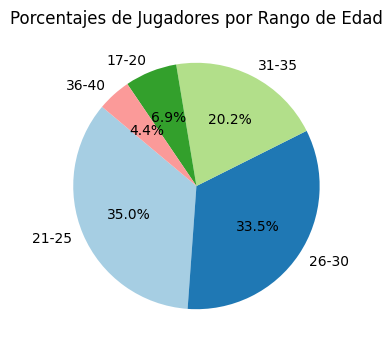

In [20]:
mostrar_pie_chart(df_proyecto,'Rango de Edad')

* _Grafico de Caja o Boxplot._

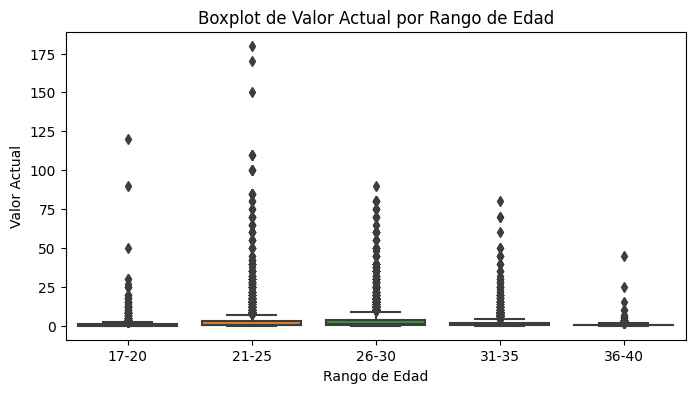

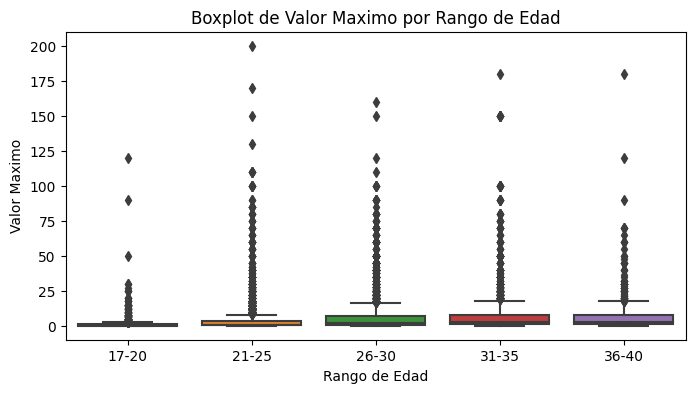

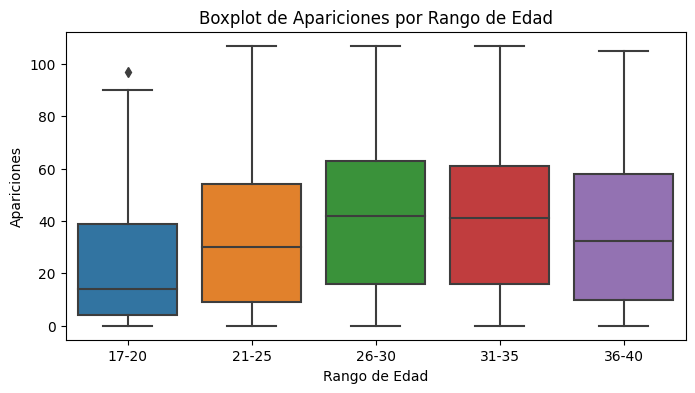

In [13]:
mostrar_boxplots(df_proyecto, 'Valor Actual','Rango de Edad')
mostrar_boxplots(df_proyecto, 'Valor Maximo','Rango de Edad')
mostrar_boxplots(df_proyecto, 'Apariciones', 'Rango de Edad')


* _Grafico de Distribuciones._

Distribucion de 'Edad'


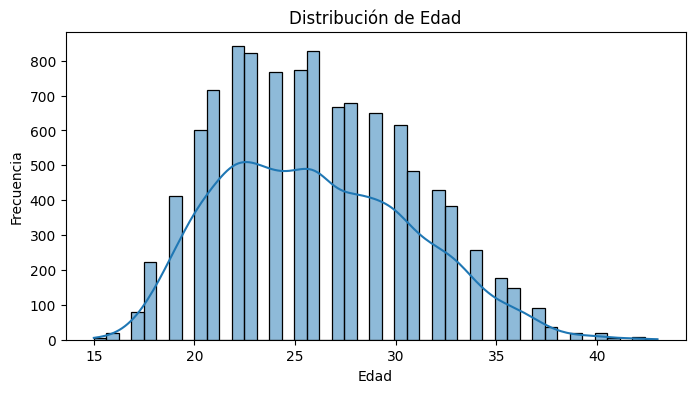

Distribucion de 'Apariciones'


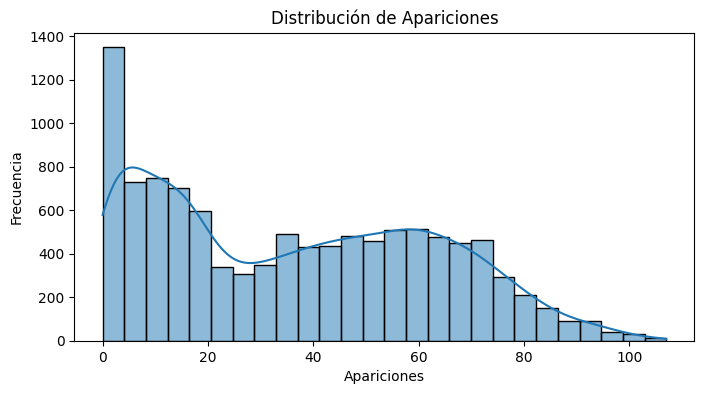

In [15]:
variables_a_mostrar=['Edad','Apariciones']
for columna in variables_a_mostrar:
    print(f"Distribucion de '{columna}'")
    mostrar_distribucion(df, columna) 

* _Grafico de Correlaciones._

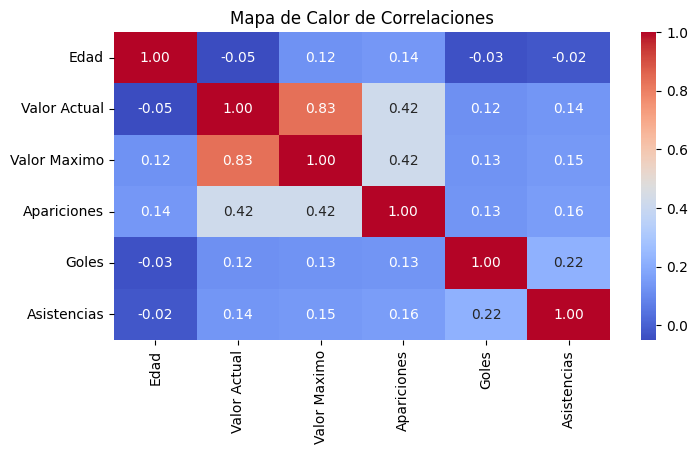

In [21]:
columnas_heatmap = ['Edad', 'Valor Actual', 'Valor Maximo', 'Apariciones', 'Goles', 'Asistencias']
mostrar_heatmap_correlacion(df_proyecto, columnas_heatmap)

* _Graficos de Barras_

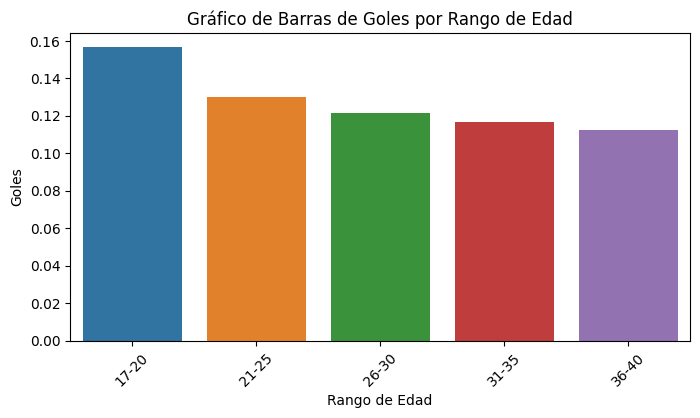

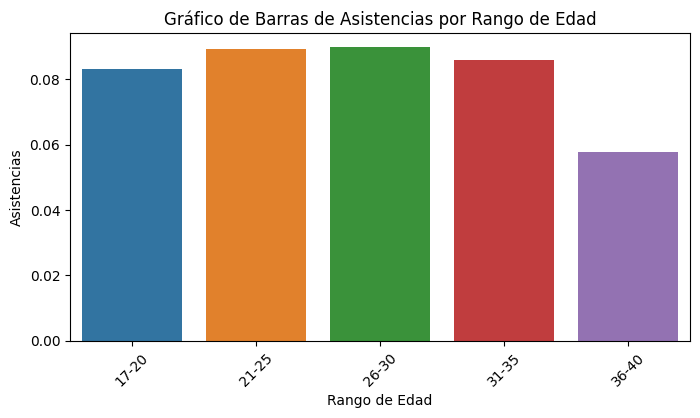

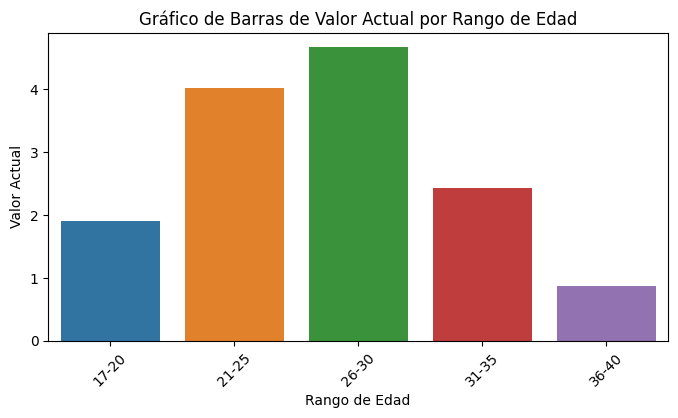

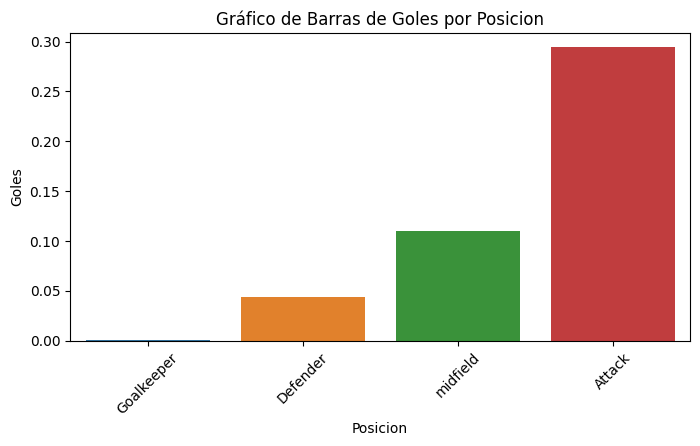

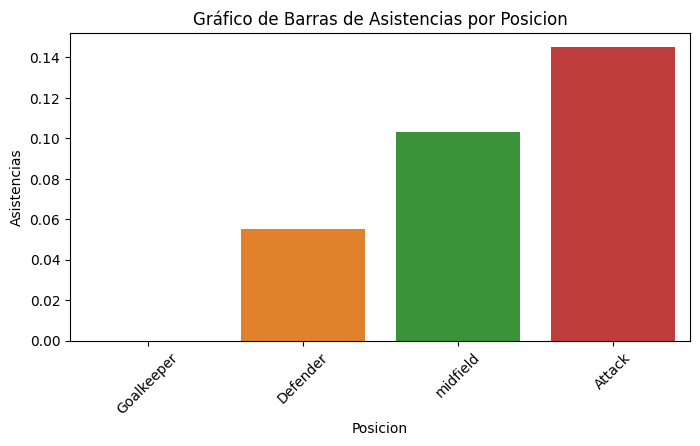

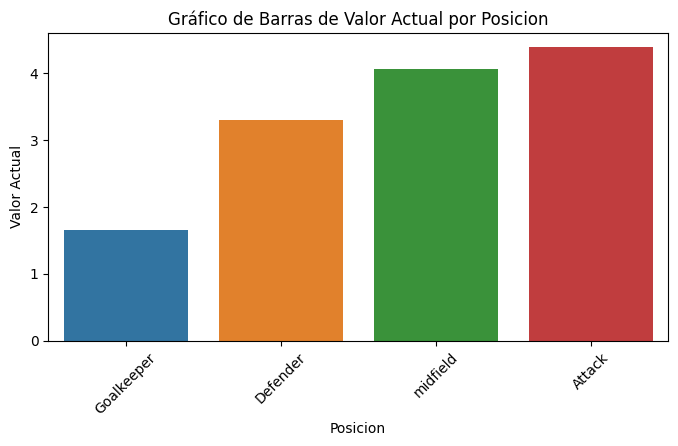

In [14]:
mostrar_bar_plot(df_proyecto, 'Rango de Edad', 'Goles')
mostrar_bar_plot(df_proyecto, 'Rango de Edad', 'Asistencias')
mostrar_bar_plot(df_proyecto, 'Rango de Edad', 'Valor Actual')
mostrar_bar_plot(df_proyecto, 'Posicion', 'Goles')
mostrar_bar_plot(df_proyecto, 'Posicion', 'Asistencias')
mostrar_bar_plot(df_proyecto, 'Posicion', 'Valor Actual')

# _INSIGHTS_

* _En el rango de 21 a 25 años se encuentran Jugadores con mayor Valor de Actual._
* _La mayor cantidad de partidos disputados se da entre 25 a 30 años._
* _La mayor cantidad de jugadores se encuentre en el rango de 20 a 25 años._
* _Alta correlacion de Valor Actual y Maximo._
* _Correlacion leve y debil entre Valor Actual y Apariciones._
* _Tendencia alta en los primeros rangos de edad (-menos 20 y 20 a 25 años)._
* _Delanteros son los jugadores mas valiosos._
* _Pico maximo de valor actual a los 25-30 años._
* _Delanteros son los que mas goles hacen luego los mediocampistas._
* _Misma tendencia en asistencias, aunque notoriamente los mediocampistas realizan mas._